<a href="https://colab.research.google.com/github/LaraSofiaLopes/Numerical-Analysis/blob/master/Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 7**
### Lara Lopes

### **Task 1**

Find the polynomial passing through the points: 

    (xi,f(xi))=(4,2),(6,8),(6,4),(1,10)


Lagrange base:

    pn(x)= sum(f(xk)lk(x)) , k=0:n <=>
    <=> pn(x) = f(x0)l0(x) + f(x1)l1(x) + f(x2)l2(x) + f(x3)l3(x) <=>
    <=> pn(x) = 2*l0(x) + 8*l1(x) + 4*l2(x) + 10*l3(x)


    l0(x) = (x-x1)/(x0-x1) * (x-x2)/(x0-x2) * (x-x3)/(x0-x3)
          = (x^3-12x^2+41x-30)/6

    l1(x) = (x-x0)/(x1-x0) * (x-x2)/(x1-x2) * (x-x3)/(x1-x3)
          = (x^3 -10x^2 +29x -20)/10

    l2(x) = (x-x0)/(x2-x0) * (x-xx1)/(x2-x1) * (x-x3)/(x2-x3)
          = (x^3 - 11x^2 + 34x -24)/-4

    l3(x) = (x-x0)/(x0-x3) * (x-x1)/(x3-x1) * (x-x2)/(x3-x2)
          = (x^3 -15x^2 + 74x -120)/-60
     

Newton base :

    xO=4 , f(x0)= 2  
    x1=6 , f(x1)= 8            
    x2=5 , f(x2)=4             
    x3=1 , f(x3)=10

    f[x0,x1]=3
    f[x0,x1,x2]=1
    f[x1,x2]=4
    f[x0,x1,x2,x3]=-1/30
    f[x1,x2,x3]=11/10
    f[x2,x3]=-3/2

    p3(x)=2+3(x-4)+(x-4)(x-6)-1/30(x-4)(x-6)(x-5)

### **Task 2**

X dataponts:  [ 0.          0.66666667  1.33333333  2.          2.66666667  3.33333333
  4.          4.66666667  5.33333333  6.          6.66666667  7.33333333
  8.          8.66666667  9.33333333 10.        ]
Y dataponts:  [ 0.          0.6183698   0.9719379   0.90929743  0.45727263 -0.19056796
 -0.7568025  -0.99895492 -0.81332939 -0.2794155   0.37415123  0.86749687
  0.98935825  0.68755122  0.09131724 -0.54402111]


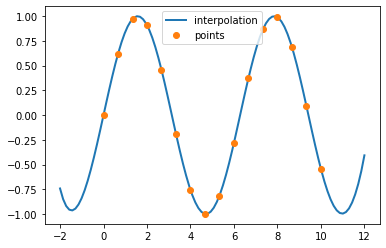

In [20]:
# Lagrange Polynomials in Python
import numpy as np

def  lagrange(x,i,xm):
  """
  Evaluates  the i-th  Lagrange  polynomial  at point x 
  based on grid  data xm
  """
  n=len(xm)-1
  y=1.
  for j in  range(n+1):
    if i!=j:
      y*=(x-xm[j])/(xm[i]-xm[j])
  return y


def  interpolation(x,xm ,ym):
  n=len(xm)-1
  lagrpoly=np.array([lagrange(x,i,xm) for i in range(n+1)])
  y = np.dot(ym ,lagrpoly)
  return y


n = randint(3,20)
xm = np.linspace(0,10,n)
ym = np.sin(xm)
xplot = np.linspace(-2,12,100)
yplot = interpolation(xplot, xm, ym)

print('X dataponts: ',xm)
print('Y dataponts: ',ym)



def polyplot(xm, ym, xplot, yplot):
  # Import pyplot as plt
  import matplotlib.pyplot as plt

  #plot the function

  plt.plot(xplot, yplot, lw=2, label='interpolation')

  plt.plot(xm, ym, 'o', label='points')

  plt.legend()
  plt.show()

polyplot(xm, ym, xplot, yplot)


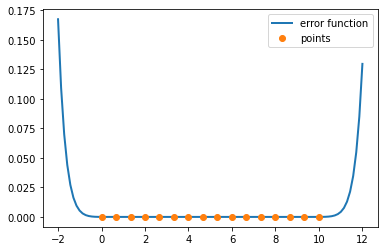

In [21]:
error= abs(yplot-np.sin(xplot))

import matplotlib.pyplot as plt
y = np.linspace(0,0,len(xm))
plt.plot(xplot, error, lw=2, label='error function')
plt.plot(xm, y, 'o', label='points' )
plt.legend()
plt.show()

The error is smaller near the nodes.

array a =  [ 0.          0.59724477 -0.3926491   0.09356413 -0.00494203 -0.00239111
  0.00065396]


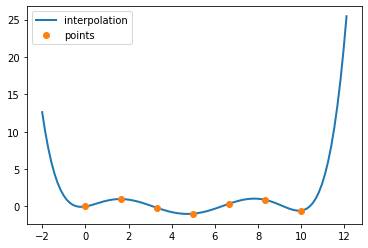

In [22]:
# Newton base
def poly_newton_coefficient(x, y):
    """
    x: list or np array contanining x data points
    y: list or np array contanining y data points
    """

    m = len(x)

    x = np.copy(x)
    a = np.copy(y).astype(float)

    for k in range(1, m):
        for i in range(m-1, k-1, -1):
            a[i] = float(a[i]-a[i-1])/float(x[i]-x[i-k])
            
    return a

def newton_interpolation(x, x_data, y_data):
    """
    x: evaluation point(s)
    x_data: data points at x
    y_data: data points at y
     """
    a = poly_newton_coefficient(x_data, y_data)
    n = len(x_data) - 1  # Degree of polynomial
    p = a[n]
    print("array a = ",a)

    for k in range(1, n + 1):
        p = a[n - k] + (x - x_data[n - k])*p

    return p



n = randint(3,20)
xm = np.linspace(0,10,n)
ym = np.sin(xm)
xplot = np.linspace(-2,12.1,100)
yplot = newton_interpolation(xplot, xm, ym)


polyplot(xm, ym, xplot, yplot)

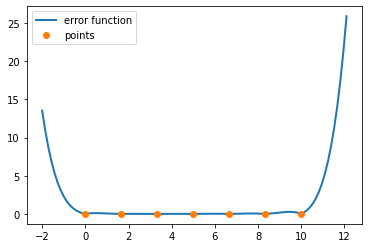

In [23]:
error= abs(yplot-np.sin(xplot))

import matplotlib.pyplot as plt
y = np.linspace(0,0,len(xm))
plt.plot(xplot, error, lw=2, label='error function')
plt.plot(xm, y, 'o', label='points' )
plt.legend()
plt.show()

The error is smaller near the nodes.